In [530]:
import numpy as np
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes #no la ocupo
from kmodes.kprototypes import KPrototypes
import kmodes.util 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer #no se si la ocupemos finalmente
from scipy.spatial.distance import cdist
import probscale
import plotly.express as px
import seaborn as sn
plt.style.use('seaborn-bright')
%matplotlib inline

data = pd.read_csv("C:/Users/nubem/Desktop/TESIS 2022/BASE DE DATOS/dominios_peru_2.csv", sep=";")
data_origen = data.copy()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,2453.0,4.135867e+05,97.215170,4.133863e+05,4.135138e+05,4.135854e+05,4.136493e+05,4.138687e+05
Y,2453.0,8.029747e+06,134.711709,8.029487e+06,8.029654e+06,8.029740e+06,8.029842e+06,8.030039e+06
Z,2453.0,4.323029e+03,74.261940,4.040564e+03,4.282565e+03,4.339421e+03,4.376240e+03,4.449960e+03
FROM,2453.0,8.112157e+01,64.072169,0.000000e+00,2.855556e+01,6.700000e+01,1.227692e+02,2.925714e+02
TO,2453.0,8.852843e+01,64.177580,2.000000e+00,3.600000e+01,7.450000e+01,1.302000e+02,3.000000e+02
AU,2453.0,1.938895e-01,0.250364,2.500000e-03,2.824215e-02,1.155911e-01,2.495570e-01,2.216000e+00
AG,2453.0,4.389682e+00,5.867870,1.000000e-01,1.796586e-01,2.251414e+00,6.380519e+00,4.003165e+01
CU,1498.0,2.994745e-02,0.064957,2.500000e-07,4.600000e-03,7.111190e-03,2.788775e-02,9.125908e-01
HG,1334.0,7.287069e-04,0.001129,4.000000e-07,1.167675e-04,3.477050e-04,8.521825e-04,1.620000e-02
AS,1424.0,4.835047e-02,0.066214,6.000000e-04,1.901675e-02,3.013411e-02,5.207648e-02,7.385652e-01


In [531]:
data1 = data[["AU", "AG", "CU", "HG", "AS", "S","X", "Y", "Z"]]
data2 = data[["BHID", "FROM", "TO", "MINTYPE_CODE", "ALT_CODE", "ALT_TEXT"]]
s = data["ALT_TEXT"] #transformación de atributo categorico a conjunto de atributos binarios
data3 = pd.get_dummies(s)

**1: Imputación de los datos faltantes:**

In [532]:
## https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
import numpy as np
from sklearn.impute import KNNImputer #Imputación con KNN
nan = np.nan
imputer = KNNImputer(n_neighbors=4, weights="uniform") #toma los valores por columna (variable independiente)
data1 = pd.DataFrame(imputer.fit_transform(data1))
data1.rename(columns = {0: 'AU', 1: 'AG',2:"CU", 3:"HG",4:"AS",5:"S",6:"X",7:"Y",8:"Z"}, inplace = True)

data2["row"] = np.arange(0, 2453, 1, dtype=int)
data1["row"] = np.arange(0, 2453, 1, dtype=int)
data3["row"] = np.arange(0, 2453, 1, dtype=int)

df_x = pd.merge(data3, data2, on='row')

df = pd.merge(data1, df_x, on='row')
df.drop(["row"], axis=1, inplace=True)
data1.drop(["row"], axis=1, inplace=True)
df.describe().T

C:\Users\nubem\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count,mean,std,min,25%,50%,75%,max
AU,2453.0,1.938895e-01,0.250364,2.500000e-03,2.824215e-02,1.155911e-01,2.495570e-01,2.216000e+00
AG,2453.0,4.389682e+00,5.867870,1.000000e-01,1.796586e-01,2.251414e+00,6.380519e+00,4.003165e+01
CU,2453.0,2.469125e-02,0.055011,2.500000e-07,4.611650e-03,7.474360e-03,2.116731e-02,9.125908e-01
HG,2453.0,1.005514e-03,0.001128,4.000000e-07,2.113400e-04,6.416200e-04,1.407770e-03,1.620000e-02
AS,2453.0,5.116694e-02,0.058787,6.000000e-04,2.200000e-02,3.458889e-02,6.132727e-02,7.385652e-01
S,2453.0,2.675813e+00,1.888934,5.238100e-03,7.282483e-01,2.725135e+00,3.996783e+00,8.409001e+00
X,2453.0,4.135867e+05,97.215170,4.133863e+05,4.135138e+05,4.135854e+05,4.136493e+05,4.138687e+05
Y,2453.0,8.029747e+06,134.711709,8.029487e+06,8.029654e+06,8.029740e+06,8.029842e+06,8.030039e+06
Z,2453.0,4.323029e+03,74.261940,4.040564e+03,4.282565e+03,4.339421e+03,4.376240e+03,4.449960e+03
AAR,2453.0,2.861802e-01,0.452067,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [533]:
fig = px.scatter_3d(df[df["MINTYPE_CODE"]==1], x="X", y="Y",z="Z", color="HG", 
#fig = px.scatter_3d(data_2022, x="X", y="Y",z="Z", color="MINTYPE_CODE", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()

In [534]:
df.to_csv("C:/Users/nubem/Desktop/TESIS 2022/BASE DE DATOS/dominios_peru_relleno.csv")

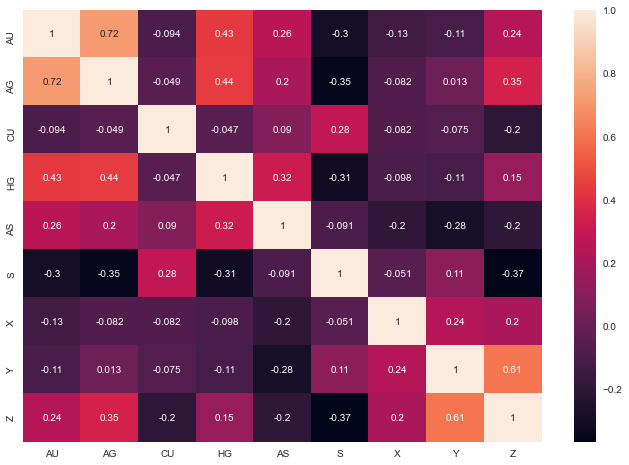

In [535]:
import seaborn as sn
plt.subplot(111)
sn.heatmap(data1.corr(method='pearson'), annot=True)
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1.5)
plt.show()

#CHEQUEAR QUE VARIABLES SE CORRELACIONAN CON EL ORO.

In [536]:
data_test = df[["X", "Y", "Z", "AU", "AG", "CU", "HG", "AS", "S"]]
data_test.head()

,X,Y,Z,AU,AG,CU,HG,AS,S
0,413712.5071,8029921.231,4420.348151,0.013608,0.661238,0.003556,0.000061,0.015262,0.500054
1,413707.4381,8029922.612,4415.094277,0.011980,0.215209,0.003081,0.000050,0.021257,0.490808
2,413702.3648,8029923.977,4409.840412,0.021285,0.716958,0.002779,0.000151,0.010248,0.439906
3,413697.2872,8029925.325,4404.586540,0.011314,0.874697,0.005993,0.000106,0.016270,5.161104
4,413692.2052,8029926.658,4399.332653,0.002500,0.100000,0.003466,0.000050,0.005520,3.476958


**2: Selección Univariada (Método A)**

In [537]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif #discutir que función ocupar
data = data_test
X = data.iloc[:,0:9]  #independent columns
y = data.iloc[:,3]    #target column 
#apply SelectKBest class to extract top 4 best features
y=y.astype('int')
bestfeatures = SelectKBest(score_func=f_classif, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

  Variables       Score
3        AU  847.758211
4        AG  235.394602
6        HG   35.579989
7        AS   23.628830


**3: Selección por importancia (Método B)**

[0.03149465 0.05021236 0.04325329 0.59179734 0.15212193 0.02783972
 0.04030911 0.03166772 0.03130387]


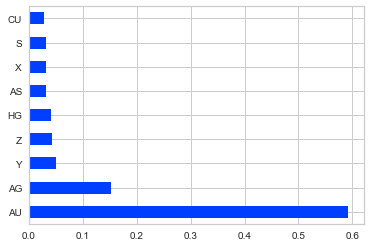

In [538]:
X = data.iloc[:,0:9]  #independent columns
y = data.iloc[:,3]    #target column 
y=y.astype('int')
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [539]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AU,2453.0,1.938895e-01,0.250364,2.500000e-03,2.824215e-02,1.155911e-01,2.495570e-01,2.216000e+00
AG,2453.0,4.389682e+00,5.867870,1.000000e-01,1.796586e-01,2.251414e+00,6.380519e+00,4.003165e+01
CU,2453.0,2.469125e-02,0.055011,2.500000e-07,4.611650e-03,7.474360e-03,2.116731e-02,9.125908e-01
HG,2453.0,1.005514e-03,0.001128,4.000000e-07,2.113400e-04,6.416200e-04,1.407770e-03,1.620000e-02
AS,2453.0,5.116694e-02,0.058787,6.000000e-04,2.200000e-02,3.458889e-02,6.132727e-02,7.385652e-01
S,2453.0,2.675813e+00,1.888934,5.238100e-03,7.282483e-01,2.725135e+00,3.996783e+00,8.409001e+00
X,2453.0,4.135867e+05,97.215170,4.133863e+05,4.135138e+05,4.135854e+05,4.136493e+05,4.138687e+05
Y,2453.0,8.029747e+06,134.711709,8.029487e+06,8.029654e+06,8.029740e+06,8.029842e+06,8.030039e+06
Z,2453.0,4.323029e+03,74.261940,4.040564e+03,4.282565e+03,4.339421e+03,4.376240e+03,4.449960e+03
AAR,2453.0,2.861802e-01,0.452067,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [540]:
data_2022 = df[["X", "Y", "Z", "AU", "AG", "HG", "AS", "S", "MINTYPE_CODE", "ALT_CODE", "BHID", 
               "AAR", "AR", "CL", "SIC", "UA", "VUG"]]
data_work = df[["Z", "AU", "AG", "HG", "AS", "S", "ALT_CODE"]] #variables a usar en kprototipos
data_2022.head()

,X,Y,Z,AU,AG,HG,AS,S,MINTYPE_CODE,ALT_CODE,BHID,AAR,AR,CL,SIC,UA,VUG
0,413712.5071,8029921.231,4420.348151,0.013608,0.661238,0.000061,0.015262,0.500054,1,2,CAL001_14,0,1,0,0,0,0
1,413707.4381,8029922.612,4415.094277,0.011980,0.215209,0.000050,0.021257,0.490808,1,2,CAL001_14,0,1,0,0,0,0
2,413702.3648,8029923.977,4409.840412,0.021285,0.716958,0.000151,0.010248,0.439906,1,2,CAL001_14,0,1,0,0,0,0
3,413697.2872,8029925.325,4404.586540,0.011314,0.874697,0.000106,0.016270,5.161104,3,2,CAL001_14,0,1,0,0,0,0
4,413692.2052,8029926.658,4399.332653,0.002500,0.100000,0.000050,0.005520,3.476958,3,2,CAL001_14,0,1,0,0,0,0


In [541]:
df_oxi = data_2022[data_2022["MINTYPE_CODE"]==1]
df_mix = data_2022[data_2022["MINTYPE_CODE"]==2]
df_sul = data_2022[data_2022["MINTYPE_CODE"]==3]
df_oxi = df_oxi.reset_index(drop=True)
df_mix = df_mix.reset_index(drop=True)
df_sul = df_sul.reset_index(drop=True)

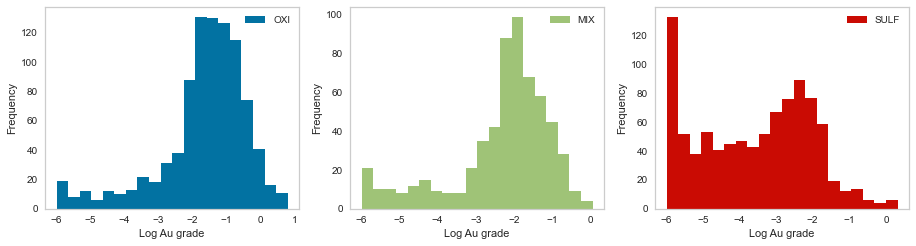

In [542]:
#fig = plt.figure(figsize=(16,4))

plt.subplot(131)
plt.hist(np.log(df_oxi["AU"]), color="b", bins=20, histtype="barstacked", label="OXI")
plt.xlabel("Log Au grade")
plt.ylabel("Frequency")
plt.grid(False)
plt.legend()

plt.subplot(132)
plt.hist(np.log(df_mix["AU"]), color="g", bins=20, histtype="barstacked", label="MIX")
plt.xlabel("Log Au grade")
plt.ylabel("Frequency")
plt.grid(False)
plt.legend()
plt.subplot(133)
plt.hist(np.log(df_sul["AU"]), color="r", bins=20, histtype="barstacked", label="SULF")
plt.xlabel("Log Au grade")
plt.ylabel("Frequency")
plt.grid(False)
plt.legend()
#plt.savefig("", dpi=300) 

plt.subplots_adjust(left=0, bottom=0, right=2, top=0.7)
plt.show()

In [543]:
fig = px.scatter_3d(data_origen[data_origen["MINTYPE_CODE"]==1], x="X", y="Y",z="Z", color="DOMINIO_C", 
#fig = px.scatter_3d(data_2022, x="X", y="Y",z="Z", color="MINTYPE_CODE", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()

In [566]:
subset = ["AU", "AG", "X", "Y", "Z"] 

df_numerical = df_oxi[subset]
df_numerical_2 = df_mix[subset]
df_numerical_3 = df_sul[subset]

X = df_numerical.copy()
X2 = df_numerical_2.copy()
X3 = df_numerical_3.copy()

X_std = StandardScaler().fit_transform(X) 
X_std_2 = StandardScaler().fit_transform(X2) 
X_std_3 = StandardScaler().fit_transform(X3) 

df_numerical_trans = pd.DataFrame(X_std)
df_numerical_trans_2 = pd.DataFrame(X_std_2)
df_numerical_trans_3 = pd.DataFrame(X_std_3)

df_numerical_trans.rename(columns={0:"Au_ppm", 1:"Ag_ppm",2:"X", 3:"Y", 4:"Z"}, inplace=True)
df_numerical_trans_2.rename(columns={0:"Au_ppm", 1:"Ag_ppm",2:"X", 3:"Y", 4:"Z"}, inplace=True)
df_numerical_trans_3.rename(columns={0:"Au_ppm", 1:"Ag_ppm",2:"X", 3:"Y", 4:"Z"}, inplace=True)

df_numerical_trans["AAR"] = df_oxi["AAR"]
df_numerical_trans["AR"] = df_oxi["AR"]
df_numerical_trans["CL"] = df_oxi["CL"]
df_numerical_trans["SIC"] = df_oxi["SIC"]
df_numerical_trans["UA"] = df_oxi["UA"]
df_numerical_trans["VUG"] = df_oxi["VUG"]

df_numerical_trans_2["AAR"] = df_mix["AAR"]
df_numerical_trans_2["AR"] = df_mix["AR"]
df_numerical_trans_2["CL"] = df_mix["CL"]
df_numerical_trans_2["SIC"] = df_mix["SIC"]
df_numerical_trans_2["UA"] = df_mix["UA"]
df_numerical_trans_2["VUG"] = df_mix["VUG"]

df_numerical_trans_3["AAR"] = df_sul["AAR"]
df_numerical_trans_3["AR"] = df_sul["AR"]
df_numerical_trans_3["CL"] = df_sul["CL"]
df_numerical_trans_3["SIC"] = df_sul["SIC"]
df_numerical_trans_3["UA"] = df_sul["UA"]
df_numerical_trans_3["VUG"] = df_sul["VUG"]

data = np.array(df_numerical_trans)
data_2 = np.array(df_numerical_trans_2)
data_3 = np.array(df_numerical_trans_3)

#

In [567]:
df_numerical_trans.describe().T

,count,mean,std,min,25%,50%,75%,max
Au_ppm,922.0,-1.830303e-16,1.000543,-1.024549,-0.643687,-0.270816,0.359637,5.964815
Ag_ppm,922.0,1.873652e-16,1.000543,-1.050255,-0.732157,-0.204708,0.389366,4.386631
X,922.0,-6.039766e-13,1.000543,-2.083112,-0.669642,-0.076487,0.569845,3.296980
Y,922.0,1.386076e-11,1.000543,-2.288555,-0.522324,-0.101820,0.376191,3.154420
Z,922.0,-8.405123e-15,1.000543,-3.677900,-0.628462,0.012115,0.725744,2.185780
AAR,922.0,5.618221e-01,0.496433,0.000000,0.000000,1.000000,1.000000,1.000000
AR,922.0,2.342733e-01,0.423774,0.000000,0.000000,0.000000,0.000000,1.000000
CL,922.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SIC,922.0,4.446855e-02,0.206246,0.000000,0.000000,0.000000,0.000000,1.000000
UA,922.0,2.603037e-02,0.159312,0.000000,0.000000,0.000000,0.000000,1.000000


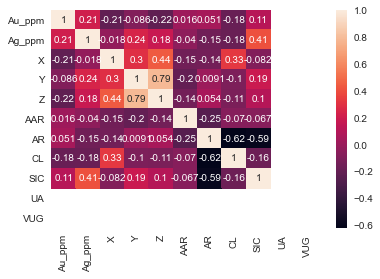

In [568]:
sn.heatmap(df_numerical_trans_3.corr(method='pearson'), annot=True) #Sería interesante ver la correlación de 

#las variables por zona mineral. 

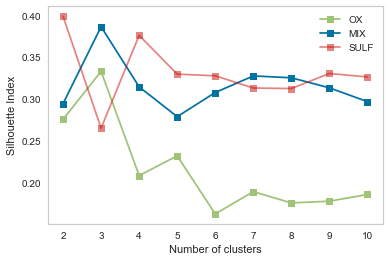

In [571]:
index = []
for k in range(2, 11):
    km = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(data, categorical=[5,6,7,8,9,10])
    labels = km.labels_
    index.append(silhouette_score(data, labels, metric='correlation'))
    
index2 = []
for k in range(2, 11):
    km2 = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters2 = km2.fit_predict(data_2, categorical=[5,6,7,8,9,10])
    labels2 = km2.labels_
    index2.append(silhouette_score(data_2, labels2, metric='correlation'))
    
index3 = []
for k in range(2, 11):
    km3 = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters3 = km3.fit_predict(data_3, categorical=[5,6,7,8,9,10])
    labels3 = km3.labels_
    index3.append(silhouette_score(data_3, labels3, metric='correlation'))
    
    

plt.plot(range(2, 11), index, 'gs-', label="OX")
plt.plot(range(2, 11), index2, 'bs-', label="MIX")
plt.plot(range(2, 11), index3, 'rs-', label="SULF", alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Index')
plt.legend()
plt.grid(False)
plt.xticks(np.arange(min(range(2, 11)), max(range(2, 11))+1, 1.0))
#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/silueta_oxidos.png", dpi=300) 
plt.show()

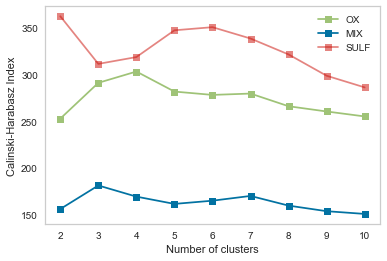

In [570]:
index = []
for k in range(2, 11):
    km = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(data, categorical=[5,6,7,8,9,10])
    labels = km.labels_
    index.append(metrics.calinski_harabasz_score(data, labels))
    #print(k, metrics.calinski_harabasz_score(data, labels))

index2 = []
for k in range(2, 11):
    km2 = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters2 = km2.fit_predict(data_2, categorical=[5,6,7,8,9,10])
    labels2 = km2.labels_
    index2.append(metrics.calinski_harabasz_score(data_2, labels2))
    #print(k, metrics.calinski_harabasz_score(data_2, labels2))
    
index3 = []
for k in range(2, 11):
    km3 = KPrototypes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters3 = km3.fit_predict(data_3, categorical=[5,6,7,8,9,10])
    labels3 = km3.labels_
    index3.append(metrics.calinski_harabasz_score(data_3, labels3))
    #print(k, metrics.calinski_harabasz_score(data_3, labels3))    

plt.plot(range(2, 11), index, 'gs-', label="OX")
plt.plot(range(2, 11), index2, 'bs-', label="MIX")
plt.plot(range(2, 11), index3, 'rs-', label="SULF", alpha=0.5)
plt.xticks(np.arange(min(range(2, 11)), max(range(2, 11))+1, 1.0))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.legend()
plt.grid(False)
#plt.title('Método del Codo k optimo')
#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/Calinski_oxidos.png", dpi=300) 

plt.show()

In [549]:
km = KPrototypes(n_clusters=2, init='Huang', n_init=5, verbose=0, random_state=42)
km2 = KPrototypes(n_clusters=2, init='Huang', n_init=5, verbose=0, random_state=42)
km3 = KPrototypes(n_clusters=2, init='Huang', n_init=5, verbose=0, random_state=42)

clusters = km.fit_predict(data, categorical=[4,5,6,7,8,9])
clusters2 = km2.fit_predict(data_2, categorical=[4,5,6,7,8,9])
clusters3 = km3.fit_predict(data_3, categorical=[4,5,6,7,8,9])

clusters_x = pd.Series(km.labels_)
clusters_p = list(clusters_x)

clusters_x2 = pd.Series(km2.labels_)
clusters_p2 = list(clusters_x2)

clusters_x3 = pd.Series(km3.labels_)
clusters_p3 = list(clusters_x3)

df_numerical_trans["clusters"] = clusters_p
df_numerical_trans["Au_original"] = df_oxi["AU"]

df_numerical_trans_2["clusters"] = clusters_p2
df_numerical_trans_2["Au_original"] = df_mix["AU"]

df_numerical_trans_3["clusters"] = clusters_p3
df_numerical_trans_3["Au_original"] = df_sul["AU"]

df_numerical_trans["X"] = df_oxi["X"]
df_numerical_trans["Y"] = df_oxi["Y"]
df_numerical_trans["Z"] = df_oxi["Z"]

df_numerical_trans_2["X"] = df_mix["X"]
df_numerical_trans_2["Y"] = df_mix["Y"]
df_numerical_trans_2["Z"] = df_mix["Z"]

df_numerical_trans_3["X"] = df_sul["X"]
df_numerical_trans_3["Y"] = df_sul["Y"]
df_numerical_trans_3["Z"] = df_sul["Z"]

In [550]:
df_numerical_trans.describe().T

,count,mean,std,min,25%,50%,75%,max
Au_ppm,922.0,-1.830303e-16,1.000543,-1.024549e+00,-6.436869e-01,-2.708163e-01,3.596371e-01,5.964815e+00
Ag_ppm,922.0,1.873652e-16,1.000543,-1.050255e+00,-7.321574e-01,-2.047084e-01,3.893662e-01,4.386631e+00
Hg_ppm,922.0,-1.324561e-16,1.000543,-1.280517e+00,-7.421811e-01,-2.053532e-01,7.019558e-01,5.590685e+00
As_ppm,922.0,-6.381976e-17,1.000543,-1.012969e+00,-5.847421e-01,-2.528049e-01,3.036019e-01,1.022182e+01
AAR,922.0,5.618221e-01,0.496433,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AR,922.0,2.342733e-01,0.423774,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CL,922.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SIC,922.0,4.446855e-02,0.206246,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
UA,922.0,2.603037e-02,0.159312,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
VUG,922.0,1.334056e-01,0.340197,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [551]:
df_numerical_trans["clusters"].replace({0: 1, 1: 2}, inplace=True)
df_numerical_trans_2["clusters"].replace({0: 1, 1: 2}, inplace=True)
df_numerical_trans_3["clusters"].replace({0: 1, 1: 2}, inplace=True)

In [552]:
#fig = px.scatter_3d(data_origen[data_origen["MINTYPE_CODE"]==1], x="X", y="Y",z="Z", color="DOMINIO_C", 
fig = px.scatter_3d(df_numerical_trans, x="X", y="Y",z="Z", color="clusters", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()

In [553]:
fig = px.scatter_3d(data_origen[data_origen["MINTYPE_CODE"]==1], x="X", y="Y",z="Z", color="DOMINIO_C", 
#fig = px.scatter_3d(df_numerical_trans, x="X", y="Y",z="Z", color="clusters", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()